## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [69]:
import csv
import matplotlib.pyplot as plt

# Funktion för att läsa innehållet i en CSV-fil.
def read_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        #använder semikolon som avgränsare.
        reader = csv.reader(file, delimiter=';')
        # Returnerar innehållet
        return list(reader)

# Läser in data från CSV-filerna 'lghpriser.csv' och 'villapriser.csv'. Dessa används för att hämta data i flera av uppgifterna.
lghData = read_file('lghpriser.csv')
villaData = read_file('villapriser.csv')







## Deluppgift 1
Ev. kommentar:

In [70]:


# Skriver ut det första 3 raderna från vardera fil
print("Lägenhetsdata:")
for row in lghData[:3]:
    print(row)

print("\nVilladata:")
for row in villaData[:3]:
    print(row)

Lägenhetsdata:
['Ar', 'manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '64.12', '63.98', '67.81', '63.87', '63.76', '67.92', '64.95', '65.31', '68.28', '66.07', '66.34', '69.38']
['2018', 'februari', '66.01', '64.29', '77.14', '65.82', '63.96', '77.42', '67.04', '65.54', '77.96', '68.02', '66.58', '78.91']

Villadata:
['Ar', 'Manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '49.39', '48.71', '50.4', '49.4', '48.7', '50.59', '50.49', '50.17', '50.81', '51.82', '51.17', '51.81']
['2018', 'februari', '51.23', '48.99', '60.75',

## Deluppgift 2
Ev. kommentar:

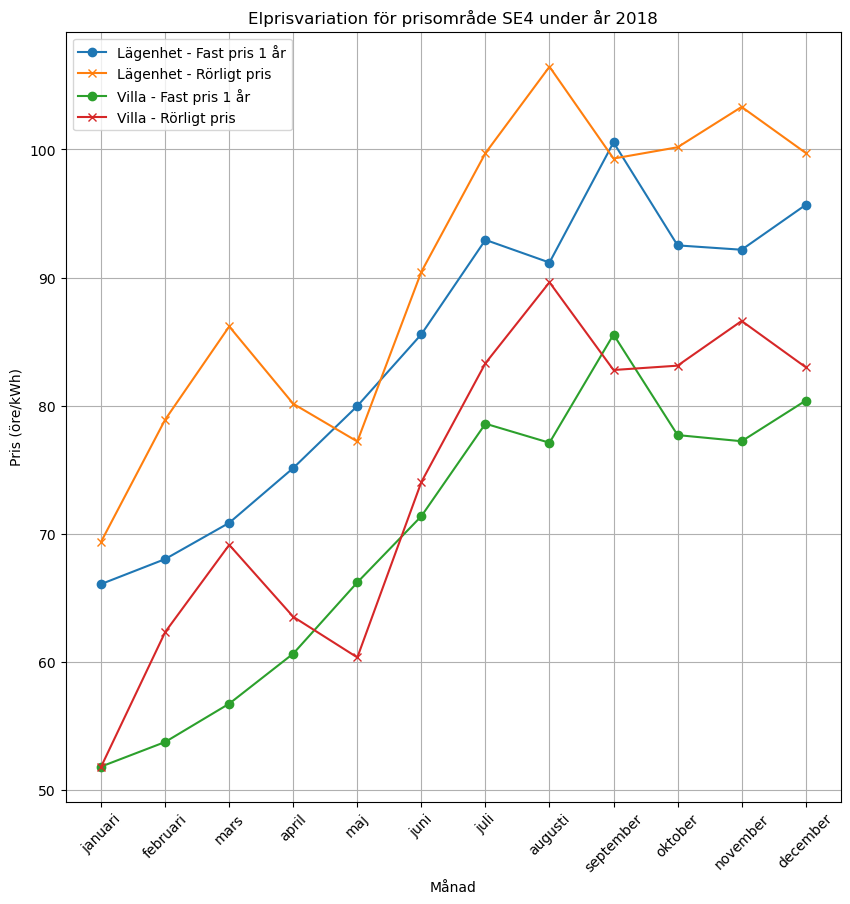

In [71]:

area_input = input('Ange prisområde (1-4): ')
year_input = input('Ange årtalet som ska presenteras (2018-2023): ')

# Beräknar index för valt prisområde 
area_index = (int(area_input) - 1) * 3 + 2  # +2 för att hoppa över år och månad som titel

# Funktion för att extrahera prisdata för ett specifikt år och prisområde från datan.
def extract_prices(data, year, area_index):
    prices = {'months': [], 'fixed': [], 'variable': []}
    for row in data:
        if row[0] == year:  # Kontrollerar om det aktuella året matchar.
            prices['months'].append(row[1])  # Lägger till månadsdata.
            # Konverterar och lägger till fast pris från CSV-data.
            prices['fixed'].append(float(row[area_index].replace(',', '.')))
            # Konverterar och lägger till rörligt pris från CSV-data.
            prices['variable'].append(float(row[area_index + 2].replace(',', '.')))
    return prices



# Funktion för att plotta linjediagram för prisdata.
def plot_prices(area, year, lgh_prices, villa_prices):
    plt.figure(figsize=(10, 10))

    # Plottar priser för lägenheter.
    plt.plot(lgh_prices['months'], lgh_prices['fixed'], label='Lägenhet - Fast pris 1 år', marker='o')
    plt.plot(lgh_prices['months'], lgh_prices['variable'], label='Lägenhet - Rörligt pris', marker='x')

    # Plottar priser för villor.
    plt.plot(villa_prices['months'], villa_prices['fixed'], label='Villa - Fast pris 1 år', marker='o')
    plt.plot(villa_prices['months'], villa_prices['variable'], label='Villa - Rörligt pris', marker='x')

    # Konfigurerar och visar diagrammet.
    plt.title(f'Elprisvariation för prisområde SE{area} under år {year}')
    plt.xlabel('Månad')
    plt.ylabel('Pris (öre/kWh)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Extraherar priser för det valda året och prisområdet
lgh_prices = extract_prices(lghData, year_input, area_index)
villa_prices = extract_prices(villaData, year_input, area_index)
# Plottar resultaten
plot_prices(area_input, year_input, lgh_prices, villa_prices)


## Deluppgift 3
Ev. kommentar:

Analys av elpriserna för kategorin lägenhetskund år 2019
Prisomr.   Rörligt pris                   Fast pris 3 år                
           min    max    medel  median min    max    medel  median
----------------------------------------------------------------------------------------------------
SE1        62.63  101.93 81.29  80.06  76.50  84.16  79.27  78.47 
SE2        62.68  102.08 81.33  80.16  76.43  83.66  78.99  78.26 
SE3        62.95  103.05 81.77  80.74  78.84  85.63  81.23  81.02 
SE4        67.95  104.24 84.54  83.44  82.08  88.04  83.79  83.61 


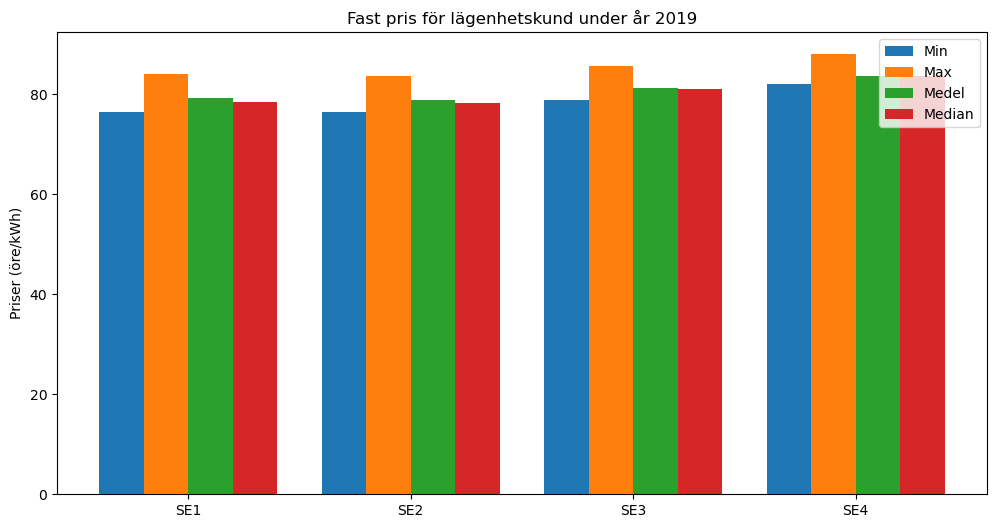

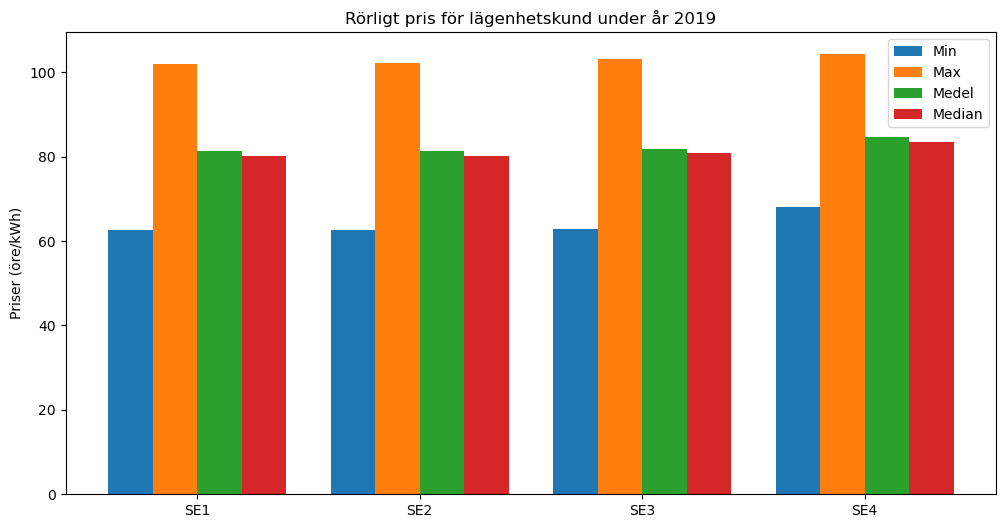

In [72]:
# användarinput
customer_type_input = input("Lägenhetskund (L) eller villakund (V)? :")
year_input = input("Ange årtalet som ska presenteras (2018-2023): ")
customer_type = 'lägenhetskund' if customer_type_input.upper() == 'L' else 'villakund'


# Funktion för att hitta det minsta värdet
def calculate_min(prices):
    min_price = prices[0]
    for price in prices[1:]:
        if price < min_price:
            min_price = price
    return min_price

# Funktion för att hitta det högsta värdet
def calculate_max(prices):
    max_price = prices[0]
    for price in prices[1:]:
        if price > max_price:
            max_price = price
    return max_price

# Funktion för att beräkna medelvärdet
def calculate_mean(prices):
    total = sum(prices)
    count = len(prices)
    return total / count

# Funktion för att beräkna medianvärdet
def calculate_median(prices):
    prices_sorted = sorted(prices)
    n = len(prices_sorted)
    mid = n // 2
    if n % 2 == 0:
        return (prices_sorted[mid - 1] + prices_sorted[mid]) / 2
    else:
        return prices_sorted[mid]

# Funktion för att extrahera prisdata för ett visst år från datan.
def extract_price_data(data, year, price_type_index):
    # Returnerar en lista med priser för det angivna året och pristypen.
    return [float(row[price_type_index].replace(',', '.')) for row in data if row[0] == year]

# Funktion för att analysera prisdata
def analyze_prices(data, year, customer_type):
    stats = {'SE1': {}, 'SE2': {}, 'SE3': {}, 'SE4': {}}

    for area in stats.keys():
        # Beräknar index för area baserat på datastrukturen.
        area_index = (int(area[-1]) - 1) * 3 + 2
        # Extraherar och beräknar statistik för fast och rörligt pris.
        prices_fixed = extract_price_data(data, year, area_index + 1)  # Fast pris 3 år
        prices_variable = extract_price_data(data, year, area_index + 2)  # Rörligt pris

        # Lagrar statistik för fasta och rörliga priser i varje område.
        stats[area]['fixed'] = {
            'min': calculate_min(prices_fixed),
            'max': calculate_max(prices_fixed),
            'mean': calculate_mean(prices_fixed),
            'median': calculate_median(prices_fixed)
        }
        stats[area]['variable'] = {
            'min': calculate_min(prices_variable),
            'max': calculate_max(prices_variable),
            'mean': calculate_mean(prices_variable),
            'median': calculate_median(prices_variable)
        }

    # Skriver ut en tabell med statistik för varje prisområde.
    print(f"Analys av elpriserna för kategorin {customer_type} år {year}")
    print("=" * 100)
    print(f"{'Prisomr.':<10} {'Rörligt pris':<30} {'Fast pris 3 år':<30}")
    print(f"{' ':<10} {'min':<6} {'max':<6} {'medel':<6} {'median':<6} {'min':<6} {'max':<6} {'medel':<6} {'median':<6}")
    print("-" * 100)

    # Loopar igenom varje område och skriver ut dess statistik.
    for area, data in stats.items():
        print(f"{area:<10} "
              f"{data['variable']['min']:<6.2f} "
              f"{data['variable']['max']:<6.2f} "
              f"{data['variable']['mean']:<6.2f} "
              f"{data['variable']['median']:<6.2f} "
              f"{data['fixed']['min']:<6.2f} "
              f"{data['fixed']['max']:<6.2f} "
              f"{data['fixed']['mean']:<6.2f} "
              f"{data['fixed']['median']:<6.2f}")
    print("=" * 100)

    return stats


# kör read files och genomför analysen
data = read_file('lghpriser.csv') if customer_type_input.upper() == 'L' else read_file('villapriser.csv')
stats = analyze_prices(data, year_input, customer_type)

# Funktion för att plotta stapeldiagram för analyserade data.
def plot_bar_charts(stats, title):
    labels = list(stats.keys())
    # Samlar in värden för varje prisområde.
    min_values = [stats[area]['min'] for area in labels]
    max_values = [stats[area]['max'] for area in labels]
    mean_values = [stats[area]['mean'] for area in labels]
    median_values = [stats[area]['median'] for area in labels]

    # Skapar stapeldiagram
    x = range(len(labels))  
    width = 0.2  # Bredden på varje stapel.

    fig, ax = plt.subplots(figsize=(12, 6))
    # Skapar staplar för varje typ av statistik.
    ax.bar(x, min_values, width, label='Min', align='center')
    ax.bar([p + width for p in x], max_values, width, label='Max', align='center')
    ax.bar([p + width*2 for p in x], mean_values, width, label='Medel', align='center')
    ax.bar([p + width*3 for p in x], median_values, width, label='Median', align='center')

    # Konfigurerar och visar diagrammet.
    ax.set_ylabel('Priser (öre/kWh)')
    ax.set_title(title)
    ax.set_xticks([p + width*1.5 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plottar stapeldiagrammen för varje prisområde och pristyp
def plot_charts(stats, year, customer_type):
    for price_type in ['fixed', 'variable']:
        # Översättning från engelska till svenska i diagrammets titel
        price_type_swedish = 'Fast' if price_type == 'fixed' else 'Rörligt'
        
        title = f'{price_type_swedish} pris för {customer_type} under år {year}'
        plot_bar_charts({area: stats[area][price_type] for area in stats}, title)
plot_charts(stats, year_input, customer_type)



## Deluppgift 4
Ev. kommentar:

Får inte januari att displayas. arbetar på en lösning.
Update: Fixat lösningen genom att lägga till december som ett värde så förändringsfaktorn för januari blir korrekt. December från förgående år tas sedan bort till plottningen.


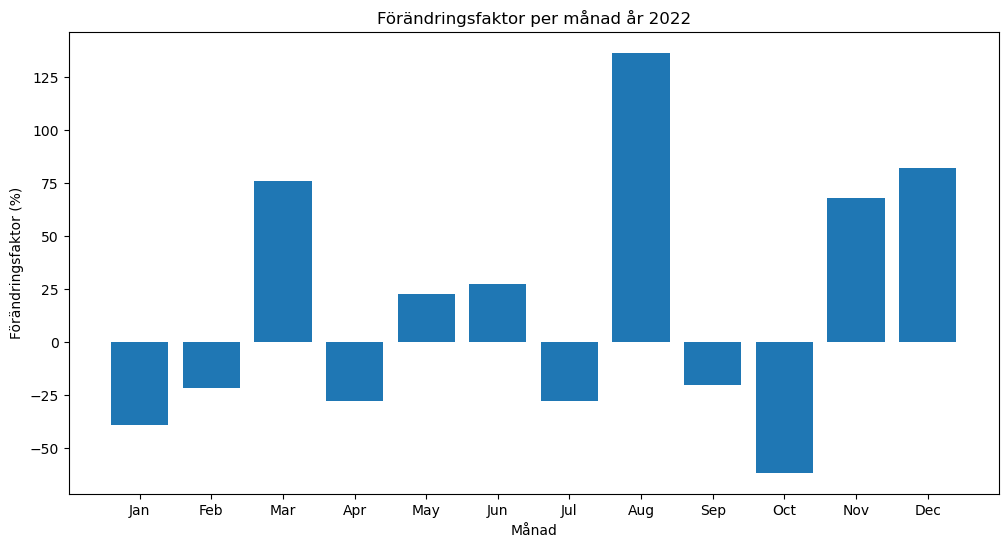

In [68]:

# användar-input. Om felaktig input ges printas ett felmeddelande ut.
def getTypeVL():
    while True:
        choose = input("Lägenhetskund (L) eller villakund (V)? : ")
        if choose.upper() in ['L', 'V']:
            return choose.upper()
        else:
            print("Ogiltigt choose. Ange 'L' för lägenhetskund eller 'V' för villakund.")

def getR_F1_f3():
    while True:
        choose = input("Ange pricing (R, F1, F3): ")
        if choose.upper() in ['R', 'F1', 'F3']:
            return choose.upper()
        else:
            print("Ogiltigt choose. Ange 'R' för rörligt, 'F1' för fast 1 år eller 'F3' för fast 3 år.")

def getpriceArea():
    while True:
        choose = input("Ange prisområde (1-4): ")
        if choose in ['1', '2', '3', '4']:
            return choose
        else:
            print("Ogiltigt choose. Ange ett nummer mellan 1 och 4.")

def getYear():
    while True:
        choose = input("Ange önskat årtal (2018-2023): ")
        if choose.isdigit() and 2018 <= int(choose) <= 2023:
            return choose
        else:
            print("Ogiltigt årtal. Ange ett årtal mellan 2018 och 2023.")

# Funktion för att beräkna förändringsfaktorer
def calculate_change_factors(prices):
    change_factors = [None] * len(prices)  # startar med tom lista där förändringsfaktorer för chooseda värden sätts in
    for i in range(1, len(prices)):
        if prices[i] is not None and prices[i - 1] is not None:
            previous_price = prices[i - 1]
            current_price = prices[i]
            change_factors[i] = ((current_price - previous_price) / previous_price) * 100
    return change_factors

# Funktion som plottar ut diagrammet
def plot_change_factors(change_factors, year):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.figure(figsize=(12, 6))
    

    
    # Skapar diagrammets staplar
    bars = plt.bar(months, [0 if x is None else x for x in change_factors])
       
    plt.xlabel('Månad')
    plt.ylabel('Förändringsfaktor (%)')
    plt.title(f'Förändringsfaktor per månad år {year}')
    plt.show()


# Huvudfunktion
def main():
    clientType = getTypeVL().upper()
    pricing = getR_F1_f3().upper()
    priceArea = getpriceArea()
    year = getYear()

    # Bestämmer vilken csv fil data ska tas från baserat på input
    data = lghData if clientType == 'L' else villaData

    # Beräkna index för chooset prisområde och pricing
    index_offset = {'R': 4, 'F1': 2, 'F3': 3}
    pris_index = index_offset[pricing] + (int(priceArea) - 1) * 3

    # Skapa en lista för årets priser, inklusive föregående december (för att räkna förändringsfaktorn på januari)
    yearPrices = [None] * 13

    # Hämta decemberpriset från föregående år
    previousYear = str(int(year) - 1)
    for row in data:
        if row[0] == previousYear and row[1].lower() == 'december':
            yearPrices[0] = float(row[pris_index].replace(',', '.')) if row[pris_index] else None

    # Fyller i listan med aktuellt års prisvärden
    for row in data:
        if row[0] == year:
            month_index = ['januari', 'februari', 'mars', 'april', 'maj', 'juni', 'juli', 'augusti', 'september', 'oktober', 'november', 'december'].index(row[1].lower())
            yearPrices[month_index + 1] = float(row[pris_index].replace(',', '.')) if row[pris_index] else None

    # Beräknar förändringsfaktorer
    change_factors = calculate_change_factors(yearPrices)

    # Plottar förändringsfaktorerna, exkluderar december från föregående år
    plot_change_factors(change_factors[1:], year)
main()

## Deluppgift 5
Ev. kommentar:

Prisstatistik för R-prisavtal (2018-2023)
Prisomr.	lägsta år mån,	högsta år mån,	medel
------------------------------------------------------------
kategori lägenhetskund:
SE1	35.28 (2020 april),	303.96 (2022 december),	85.36
SE2	34.66 (2020 april),	305.86 (2022 december),	86.17
SE3	37.81 (2020 juli),	394.88 (2022 december),	111.66
SE4	45.42 (2020 maj),	426.37 (2022 augusti),	125.15
kategori villakund:
SE1	17.82 (2020 april),	284.43 (2022 december),	68.01
SE2	17.58 (2020 april),	286.79 (2022 december),	68.87
SE3	21.72 (2020 juli),	375.08 (2022 december),	94.37
SE4	28.68 (2020 maj),	409.09 (2022 augusti),	107.67
------------------------------------------------------------


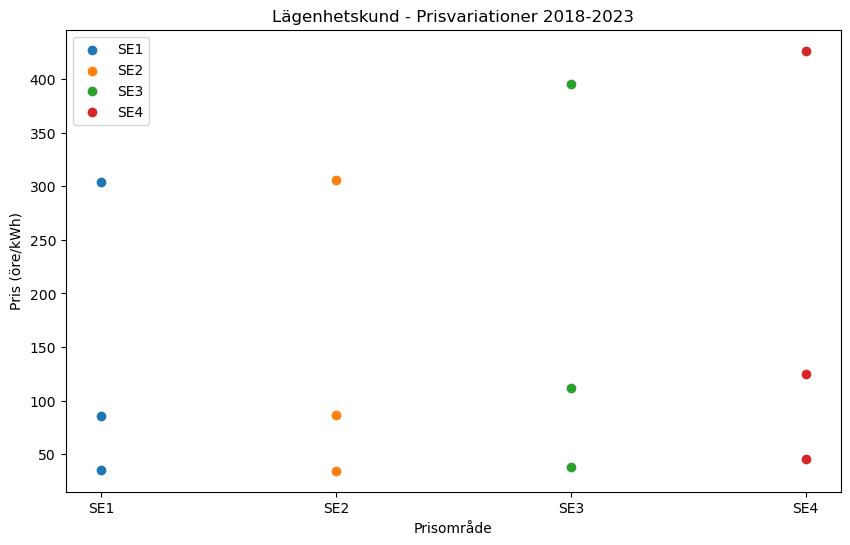

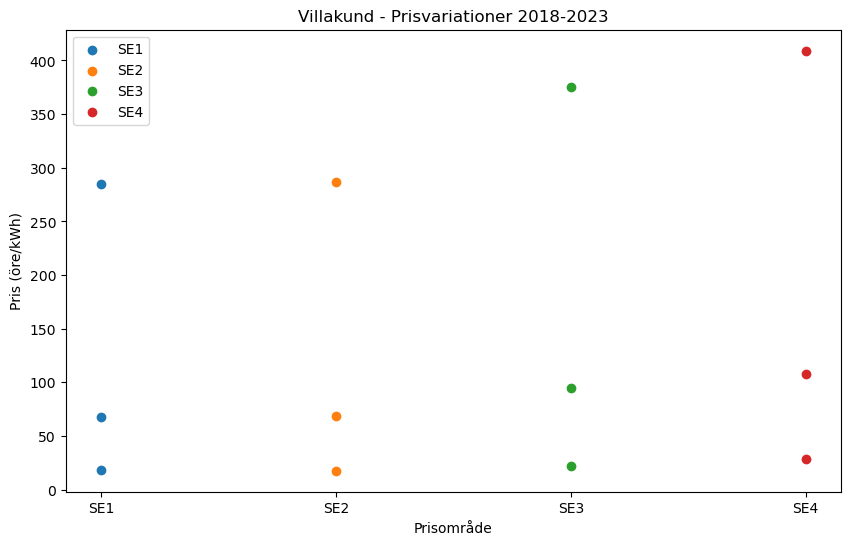

In [52]:
# beräknar statistik och hämtar år och månad för min och max
def calculate_min_max_mean_with_date(prices):
    if not prices:
        return (0, '', ''), (0, '', ''), 0

    min_price = min(prices, key=lambda x: x[0])
    max_price = max(prices, key=lambda x: x[0])
    mean_price = sum(price[0] for price in prices) / len(prices)

    return min_price, max_price, mean_price

# Plottar punktdiagrammet
def plot_price_chart(data, title):
    plt.figure(figsize=(10, 6))
    for area, values in data.items():
        plt.scatter([area] * len(values), values, label=area)
    plt.xlabel('Prisområde')
    plt.ylabel('Pris (öre/kWh)')
    plt.title(title)
    plt.legend()
    plt.show()



# Funktion för att bearbeta och extrahera data för en kundtyp
def process_data(data, prisavtal_indices, prisavtal):
    chart_data = {}
    table_data = {}

    for area in range(1, 5):
        area_index = prisavtal_indices[prisavtal][area - 1]
        prices = [(float(row[area_index].replace(',', '.')), row[0], row[1]) for row in data if row[0] in map(str, range(2018, 2024)) and row[area_index]]

        min_price, max_price, mean_price = calculate_min_max_mean_with_date(prices)
        table_data[f"SE{area}"] = (min_price, max_price, mean_price)
        
        # Sparar endast minsta, högsta och medelpriset för varje område i chart_data
        chart_data[f"SE{area}"] = [min_price[0], max_price[0], mean_price]

    return chart_data, table_data

# Huvudfunktionen
def main():
    
    prisavtal = input("Ange prisavtal (R, F1, F3): ").upper()
    prisavtal_indices = {'R': [4, 7, 10, 13], 'F1': [2, 5, 8, 11], 'F3': [3, 6, 9, 12]}

    lgh_chart_data, lgh_table_data = process_data(lghData, prisavtal_indices, prisavtal)
    villa_chart_data, villa_table_data = process_data(villaData, prisavtal_indices, prisavtal)

    print(f"Prisstatistik för {prisavtal}-prisavtal (2018-2023)")
    print("Prisomr.\tlägsta år mån,\thögsta år mån,\tmedel")
    print("-" * 60)
    print("kategori lägenhetskund:")
    for area, (min_price, max_price, mean_price) in lgh_table_data.items():
        print(f"{area}\t{min_price[0]:.2f} ({min_price[1]} {min_price[2]}),\t{max_price[0]:.2f} ({max_price[1]} {max_price[2]}),\t{mean_price:.2f}")

    print("kategori villakund:")
    for area, (min_price, max_price, mean_price) in villa_table_data.items():
        print(f"{area}\t{min_price[0]:.2f} ({min_price[1]} {min_price[2]}),\t{max_price[0]:.2f} ({max_price[1]} {max_price[2]}),\t{mean_price:.2f}")
    print("-" * 60)

    plot_price_chart(lgh_chart_data, "Lägenhetskund - Prisvariationer 2018-2023")
    plot_price_chart(villa_chart_data, "Villakund - Prisvariationer 2018-2023")

main()